<a href="https://colab.research.google.com/github/jackty9/Beyond_Accuracy_Classification_Metrics_in_Python/blob/main/Medium_beyond_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create classification data

In [8]:
# import libraries
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import NearMiss
from matplotlib import pyplot
from numpy import where
# create dataset - imbalanced in the ratio of 90:10
X, y = make_classification(n_samples=1000, n_features=20, n_redundant=1,
	n_clusters_per_class=1, weights=[0.9], flip_y=0.3, random_state=1)
counter = Counter(y)
print(counter)

Counter({0: 785, 1: 215})


In [9]:
#Import Train-test split library
from sklearn.model_selection import train_test_split

#Train-test split the data 
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.30)

# Random forest

In [10]:
#Import Random Forest libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

#Create a RF classifider
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

# Model Accuracy, how often is the classifier correct?
print("Accuracy on test set:",clf.score(X_test, y_test))

Accuracy on test set: 0.83


# Model Evaluation with Confusion Matrix and Classification Report

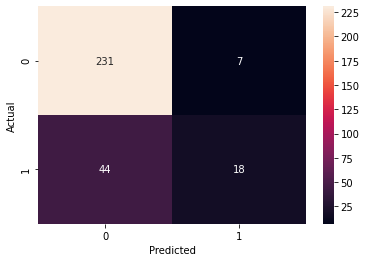

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       238
           1       0.72      0.29      0.41        62

    accuracy                           0.83       300
   macro avg       0.78      0.63      0.66       300
weighted avg       0.82      0.83      0.80       300



In [11]:
# Importing the classification report, confusion matrix, and plotting libraries
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#prediction on test data
pred=clf.predict(X_test)

#plot confusion matrix
results = {'y_Actual':y_test, 'y_Predicted':pred}
df_results = pd.DataFrame(results, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df_results['y_Actual'], df_results['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.show()

#print classification report
print(classification_report(y_test, pred))